In [ ]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import seaborn as sns
sns.set()
import cv2
class TaylorSeries:
    def __init__(self, function, order = 5, center = 0, domain = np.linspace(-5, 5, 501)):
        self.function = function
        self.order = order
        self.domain = domain + center
        self.center = center
        self.set_series()

    def set_series(self):
        self.coeffs = [self.function(self.center)]
        center_idx = np.argmin(np.abs(self.domain - self.center))
        current_y = self.function(self.domain)
        for i in range(1, self.order):
            current_y = np.gradient(current_y, self.domain, edge_order = 2)
            self.coeffs.append(current_y[center_idx] / factorial(i))
            
    def get_series(self, domain = None):
        if domain is None:
            domain = self.domain
        y = np.zeros(domain.size)
        for i, c in enumerate(self.coeffs):
            y += c * (domain - self.center)**i
        return y
    
    @property
    def string(self):
        s = ''
        for i, c in enumerate(self.coeffs):
            s += f"{c:.2f}*x^{i} + "
        return s[:-3]

In [ ]:
# where in the x axis does the video start and end
START = -10
END = 10

FPS = 60
LENGTH = 15

ORDER = 6 # keep this below 7 as numpy.gradient doesnt work well when you use it that much

SIZE = (16, 9) # image size
IMAGE_CENTER = 2 # center of approximation for the taylor series

YLIM = 30 # how much above and below the center of the approximation to show in the y axis

def func(x): # to approximate
    return x**2 - 2*x - 3 + 2 * np.sin(2*x) + 5 * np.cos(2*x) + np.arctan(1/2 * x)*6 - 20 * np.cos(x)**4

-3.67*x^0 + 3.20*x^1 + -5.79*x^2 + -19.45*x^3 + 5.03*x^4 + 19.63*x^5


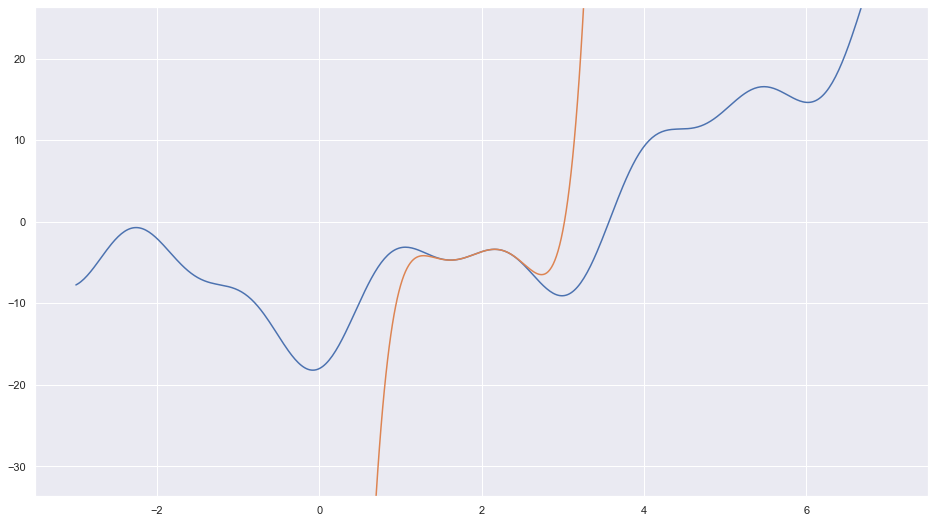

In [ ]:
series = TaylorSeries(func, ORDER, IMAGE_CENTER)
print(series.string)
fig, ax = plt.subplots(figsize=SIZE)
plt.ylim((series.function(series.center) - YLIM, series.function(series.center) + YLIM))
plt.plot(series.domain, series.function(series.domain))
plt.plot(series.domain, series.get_series())

In [ ]:
video = cv2.VideoWriter('video.mp4', cv2.VideoWriter_fourcc('A','V','C','1'), FPS, (720, 720))

for i, a in enumerate(np.linspace(START, END, FPS*LENGTH)):
    series = TaylorSeries(func, ORDER, a)
    series.set_series()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.ylim((series.function(series.center) - YLIM, series.function(series.center) + YLIM))
    plt.plot(series.domain, series.function(series.domain))
    plt.plot(series.domain, series.get_series())
    plt.close(fig)

    canvas = FigureCanvas(fig)
    canvas.draw()
    mat = np.array(canvas.renderer._renderer)
    mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)
    video.write(mat)

video.release()